# Single Phase Diffusion

## Example - NiCrAl System

Along with precipitation, kawin also supports one dimensional diffusion models. In this example, a diffusion couple will be simulated between two different NiCrAl compositions. Both phases will be FCC.

Note: Fluxes are calculated on a volume fixed frame of reference. In this frame of reference, the location of the Matano plane is fixed. If a lattice fixed frame of reference is used, then the movement of the Matano plane would move (this would be similar to the Smigelskas–Kirkendall experiments).

## Setup

The diffusion model handles the mesh creation and interfaces with the Thermodynamics module to compute fluxes from mobility and the curvature of the Gibbs free energy surface

Loading the Thermodynamics object is the same as done for creating a precipitation model. The GeneralThermodynamics object can be used here since the functions necessary for the diffusion model are the same for binary and multicomponent systems.

In [1]:
from kawin.thermo import GeneralThermodynamics

therm = GeneralThermodynamics('NiCrAl.tdb', ['NI', 'CR', 'AL'], ['FCC_A1'])

The next step is to create the diffusion model. The model requires the z-coordinates, elements and phases upon initialization. Initial conditions can be added with the composition either as a step function, linear function, delta function or a user-defined function. Finally, boundary conditions are assumed to be no-flux conditions; however, constant flux or composition may also be defined.

Defining the initial and boundary conditions must specify the element it is being applied to.

Here, a diffusion couple composed of Ni-7.7Cr-5.4Al / Ni-35.9Cr-6.2Al will be used.

Plotting functions are stored in the diffusion object and can be used to look at the initial conditions.

(0.0, 0.1)

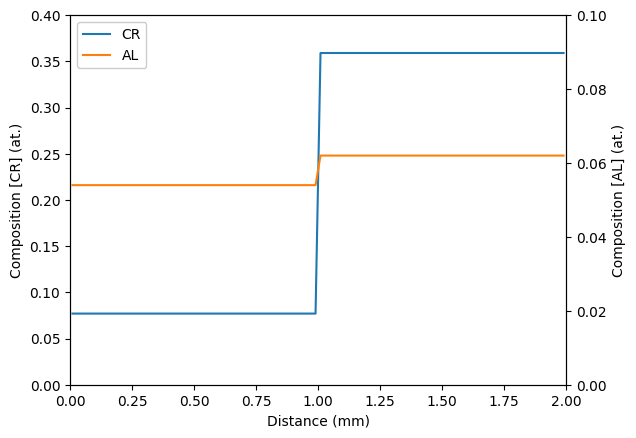

In [2]:
import matplotlib.pyplot as plt
from kawin.diffusion import SinglePhaseModel
from kawin.diffusion.mesh import ProfileBuilder, StepProfile1D, Cartesian1D
from kawin.diffusion.Plot import plot1DTwoAxis

#Define mesh spanning between -1mm to 1mm with 100 volume elements
mesh = Cartesian1D(['CR', 'AL'], [0, 2e-3], 100)

profile = ProfileBuilder()
profile.addBuildStep(StepProfile1D(1e-3, [0.077, 0.054], [0.359, 0.062]), ['CR', 'AL'])
mesh.setResponseProfile(profile)

temperature = 1200+273.15
m = SinglePhaseModel(mesh, ['NI', 'CR', 'AL'], ['FCC_A1'], 
                     thermodynamics=therm, temperature=temperature, record=True)

fig, axL = plt.subplots()
axR = axL.twinx()
plot1DTwoAxis(m, 'CR', 'AL', zScale=1e-3, axL=axL, axR=axR)
axL.set_xlabel('Distance (mm)')
axL.set_ylim([0, 0.4])
axR.set_ylim([0, 0.1])

In addition to the initial and boundary conditions, the temperature and Thermodynamics object must be supplied to the diffusion model.

Similar to the precipitation model, progress on the simulation can be outputted by setting verbose to True and setting vIt to the number of iterations before a status update on the model is outputted.

In [3]:
from kawin.solver import explicitEulerIterator
m.solve(100*3600, iterator=explicitEulerIterator, verbose=True, vIt=100)

Iteration	Sim Time (h)	Run time (s)
0		0.0e+00		0.0
100		2.8e+01		7.7
200		5.6e+01		16.2
300		8.4e+01		20.8
356		1.0e+02		22.4


### Plotting

Plotting the final composition profile is the same as plotting the initial profile.

(0.0, 0.1)

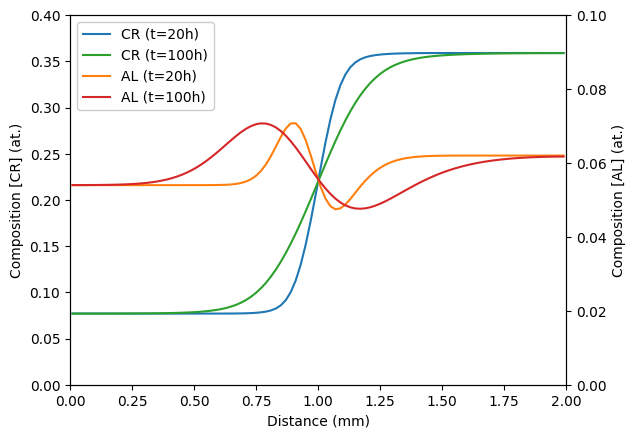

In [4]:
fig, axL = plt.subplots()
axR = axL.twinx()

# Plot at 20 hours
plot1DTwoAxis(m, 'CR', 'AL', zScale=1e-3, axL=axL, axR=axR, 
              time=20*3600, 
              label={'CR': 'CR (t=20h)', 'AL': 'AL (t=20h)'})

# Plot at final time
plot1DTwoAxis(m, 'CR', 'AL', zScale=1e-3, axL=axL, axR=axR, 
              label={'CR': 'CR (t=100h)', 'AL': 'AL (t=100h)'}, 
              color={'CR': 'C2', 'AL': 'C3'})
axL.set_xlabel('Distance (mm)')
axL.set_ylim([0, 0.4])
axR.set_ylim([0, 0.1])

Fluxes can be computed and plotted at the current state of the model.

Text(0.5, 0, 'Distance (mm)')

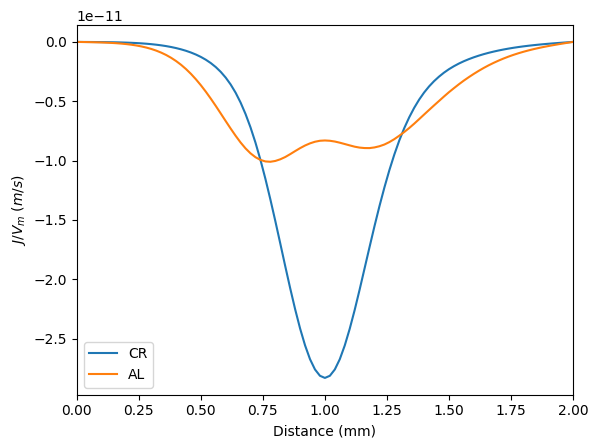

In [5]:
from kawin.diffusion.Plot import plot1DFlux
fig, ax = plt.subplots()
plot1DFlux(m, ['CR', 'AL'], zScale=1e-3, ax=ax)
ax.set_xlabel('Distance (mm)')

### Single phase diffusion in different coordinate systems
The mesh in the single phase diffusion model can be replaced with Cylindrical or Spherical coordinates

Iteration	Sim Time (h)	Run time (s)
0		0.0e+00		0.0
300		8.4e+01		21.0
356		1.0e+02		23.2
Iteration	Sim Time (h)	Run time (s)
0		0.0e+00		0.0
300		8.4e+01		30.0
357		1.0e+02		35.7
Iteration	Sim Time (h)	Run time (s)
0		0.0e+00		0.0
300		8.4e+01		26.5
357		1.0e+02		32.2


(0.0, 0.1)

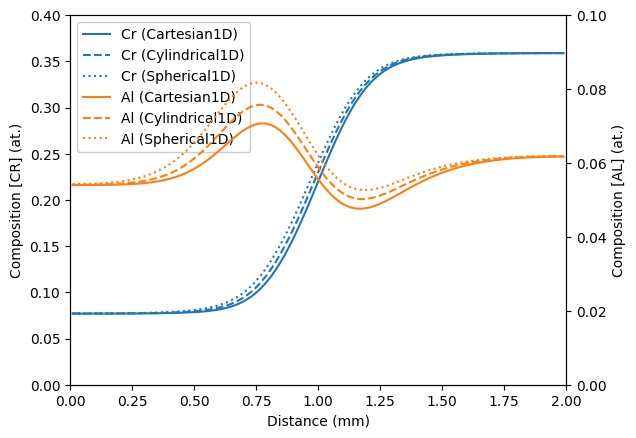

In [6]:
from kawin.diffusion.mesh import Cylindrical1D, Spherical1D
meshes = [
    Cartesian1D(['CR', 'AL'], [0, 2e-3], 100),
    Cylindrical1D(['CR', 'AL'], [0, 2e-3], 100),
    Spherical1D(['CR', 'AL'], [0, 2e-3], 100)
]
linestyles = ['-', '--', ':']
labels = ['cartesian', 'cylindrical', 'spherical']
fig, axL = plt.subplots()
axR = axL.twinx()
for i, mesh in enumerate(meshes):
    mesh.setResponseProfile(profile)
    m = SinglePhaseModel(mesh, ['NI', 'CR', 'AL'], ['FCC_A1'], therm, temperature, record=False)
    m.solve(100*3600, iterator=explicitEulerIterator, verbose=True, vIt=300)

    plot1DTwoAxis(m, 'CR', 'AL', zScale=1e-3, axL=axL, axR=axR, linestyle=linestyles[i], 
                  label={'AL': f'Al ({mesh.__class__.__name__})', 'CR': f'Cr ({mesh.__class__.__name__})'})

axL.set_xlabel('Distance (mm)')
axL.set_ylim([0, 0.4])
axR.set_ylim([0, 0.1])

### Periodic boundary conditions

Iteration	Sim Time (h)	Run time (s)
0		0.0e+00		0.0
100		2.8e+01		4.6
200		5.7e+01		9.2
300		8.9e+01		16.4
331		1.0e+02		19.6


(0.0, 0.1)

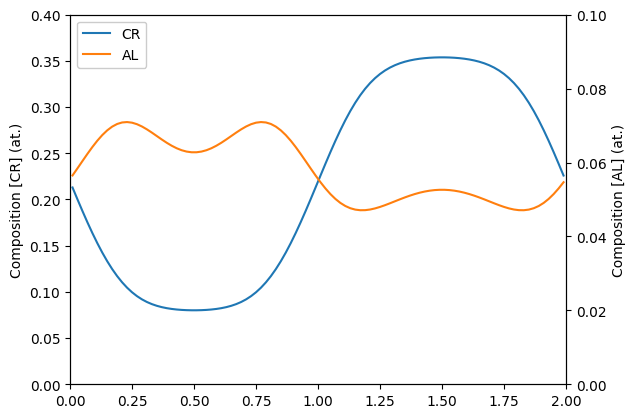

In [7]:
from kawin.diffusion.mesh import PeriodicBoundary1D

mesh = Cartesian1D(['CR', 'AL'], [0, 2e-3], 100)
mesh.setResponseProfile(profile, boundaryConditions=PeriodicBoundary1D())
m = SinglePhaseModel(mesh, ['NI', 'CR', 'AL'], ['FCC_A1'], therm, temperature, record=False)
m.solve(100*3600, iterator=explicitEulerIterator, verbose=True, vIt=100)

fig, axL = plt.subplots()
axR = axL.twinx()
plot1DTwoAxis(m, 'CR', 'AL', zScale=1e-3, axL=axL, axR=axR)
axL.set_ylim([0, 0.4])
axR.set_ylim([0, 0.1])

### 2D mesh

Iteration	Sim Time (h)	Run time (s)
0		0.0e+00		0.0
10		5.6e+00		1.7
20		1.1e+01		5.2
30		1.7e+01		10.6
36		2.0e+01		14.9


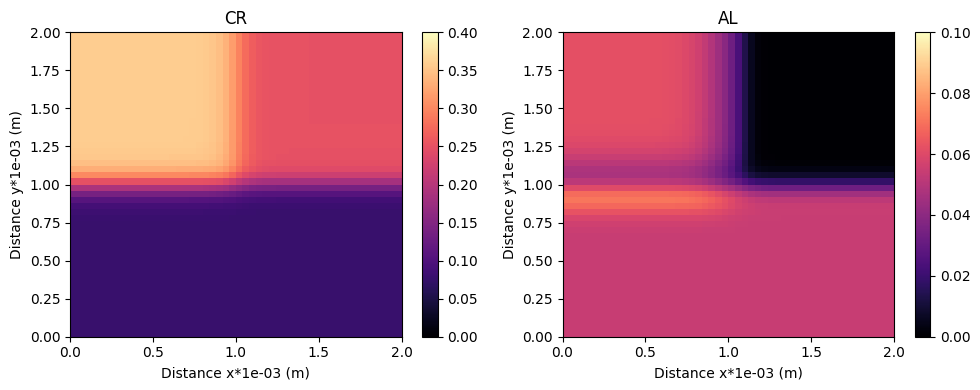

In [8]:
from kawin.diffusion.mesh import Cartesian2D, BoundedRectangleProfile
from kawin.diffusion.Plot import plot2D

mesh = Cartesian2D(['CR', 'AL'], [0, 2e-3], 50, [0, 2e-3], 50)
profile2d = ProfileBuilder()
profile2d.addBuildStep(BoundedRectangleProfile([0,0], [2e-3, 1e-3], [0.077, 0.054]), ['CR', 'AL'])
profile2d.addBuildStep(BoundedRectangleProfile([0,1e-3], [1e-3, 2e-3], [0.359, 0.062]), ['CR', 'AL'])
profile2d.addBuildStep(BoundedRectangleProfile([1e-3,1e-3], [2e-3,2e-3], [0.25, 0.0]), ['CR', 'AL'])
mesh.setResponseProfile(profile2d)

m = SinglePhaseModel(mesh, ['NI', 'CR', 'AL'], ['FCC_A1'], therm, temperature, record=False)
m.solve(20*3600, iterator=explicitEulerIterator, verbose=True, vIt=10)

fig, ax = plt.subplots(1,2,figsize=(10,4))
_, cm = plot2D(m, 'CR', zScale=1e-3, ax=ax[0], cmap='magma', vmin=0, vmax=0.4)
fig.colorbar(cm, ax=ax[0])
_, cm = plot2D(m, 'AL', zScale=1e-3, ax=ax[1], cmap='magma', vmin=0, vmax=0.1)
fig.colorbar(cm, ax=ax[1])
fig.tight_layout()

## References

1. A. Borgenstam, A. Engstrom, L. Hoglund, J. Agren, "DICTRA, a Tool for Simulation of Diffusional Transformations in Alloys" *Journal of Phase Equilibria* 21 (2000) p. 269
2. A. Engstrom and J. Agren, "Assessment of Diffusional Mobilities in Face-Centered Cubic Ni-Cr-Al Alloys" *Z. Metallkd.* 87 (1996) p. 92